In [1]:
import sys
import os
import mdtraj.io as mdio
from msmbuilder.io import save_meta,load_meta
from msmbuilder.dataset import dataset
from msmbuilder.cluster import KCenters
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.cluster import MiniBatchKMedoids
from msmbuilder.msm import MarkovStateModel
from msmbuilder.lumping import PCCAPlus
from msmbuilder.lumping import PCCA
from msmbuilder.decomposition import tICA
from msmbuilder.msm import implied_timescales
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=20)

/software/anaconda2/envs/msmb/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/software/anaconda2/envs/msmb/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
cd /home/disk2/wdd/PDZ/12concentration_MSM_Q0930/

/home/disk2/wdd/PDZ/12concentration_MSM_Q0930


In [3]:
trj_information=np.loadtxt('trj_select2.cs')

In [4]:
all_Q=[]
for eachin in trj_information:
    #print eachin[0]
    filename='/home/disk2/wdd/PDZ/12concentration_MSM_Q/h5/Qall/fit'+str(int(eachin[0]))+'_chain'+str(int(eachin[1]))+'_Q_s.h5'
    endtrj=int(eachin[2])*10+1
    Q = dataset(filename)
    all_Q.append(Q[0][0:endtrj])
    del Q
all_arr=np.array(all_Q)

In [18]:
os.chdir('/home/disk2/wdd/PDZ/12concentration_MSM_Q0825')
tica_lag=[20,50,100]
num_components=[4,5,6,8]
num_clusters=[400,500,600]
lagtime=[500,700]
for tlag in tica_lag:
    for ncom in num_components:
        tica_model = tICA(lag_time=tlag, n_components=ncom,kinetic_mapping=True)
        tica_model.fit(all_arr)
        tica_trajs = tica_model.transform(all_arr)
        for nc in num_clusters:
            print nc
            clusterer = KCenters(n_clusters=nc)
            clustered_trajs = clusterer.fit_transform(tica_trajs)
            for lg in lagtime:
                msm=MarkovStateModel(lag_time=lg,reversible_type='mle', ergodic_cutoff='on',verbose=False)
                msm.fit(clustered_trajs)
                lab_fix=msm.transform(clustered_trajs,mode='fill')
                os.chdir('/home/disk2/wdd/PDZ/12concentration_MSM_Q0825')
                dirname='kcenters_micro'+str(nc)+'_lagtiame'+str(lg)+'_tica'+str(ncom)+'tlag'+str(tlag)
                os.mkdir(dirname)
                os.chdir(dirname)
                wf=open('Populations.dat','w')
                for h in msm.populations_:
                    wf.write(str(h)+'\n')
                wf.close()
                print msm.score(lab_fix)
                matrix = msm.transmat_
                wf=open('matrix.dat','w')
                for h in matrix:
                    for l in h:
                        wf.write(str(l)+'    ')
                    wf.write('\n')
                wf.close()
                save_meta(clustered_trajs,'clustered_trajs.pickl')
                save_meta(msm,'msm.pickl')
                os.system('/home/disk2/wdd/msm_tools/CKtestV5 -msm msm.pickl -clu clustered_trajs.pickl -dt 10 -T 7')

400
(17.7487651182+2.11039583777e-16j)
(15.4295086746+1.1028942407e-16j)
500
(18.7066783698-2.53434050188e-16j)
(16.0057385614+3.57014361292e-16j)
600


/software/anaconda2/envs/msmb/lib/python2.7/site-packages/msmbuilder-3.8.0-py2.7-linux-x86_64.egg/msmbuilder/msm/msm.py:451: ComplexWarning: Casting complex values to real discards the imaginary part
  mapped_V[dest_indices, :] = np.take(V, source_indices, axis=0)


nan
nan
400


/software/anaconda2/envs/msmb/lib/python2.7/site-packages/msmbuilder-3.8.0-py2.7-linux-x86_64.egg/msmbuilder/msm/core.py:408: RuntimeWarning: divide by zero encountered in true_divide
  lv[:, i] = lv[:, i] / np.sqrt(np.dot(lv[:, i], lv[:, i] / lv[:, 0]))
/software/anaconda2/envs/msmb/lib/python2.7/site-packages/msmbuilder-3.8.0-py2.7-linux-x86_64.egg/msmbuilder/msm/core.py:408: RuntimeWarning: invalid value encountered in true_divide
  lv[:, i] = lv[:, i] / np.sqrt(np.dot(lv[:, i], lv[:, i] / lv[:, 0]))


nan
nan
500
nan
nan
600
-53189.8142084
nan
400
21.0283303261
17.9665667345
500
25.1229720712
2.72258506486e+19
600
nan
nan
400
20.9053066245
nan
500
nan
nan
600
66891.245535
nan
400
nan
nan
500
nan
nan
600
nan
nan
400
19.6337163045
nan
500
21.2125781258
nan
600
nan
nan
400
20.4268511066
16.4925789833
500
nan
nan
600
-1332.66598379
nan
400
23.2889469188
nan
500
nan
nan
600
284326.3467
nan
400
nan
nan
500
nan
nan
600
nan
1.01367256599e+12
400
20.8031771352
nan
500
7.64564505985
nan
600
nan
-2615272.29019
400
18.9105185303
25.5808461914
500
20.9198991725
nan
600
20.8840405605
nan
400
22.9220058322
-98318.6820356
500
nan
nan
600
nan
nan


In [6]:
os.chdir('/home/disk2/wdd/PDZ/12concentration_MSM_Q0825')
tica_lag=[20]
num_components=[5]
num_clusters=[400]
lagtime=[700]
for tlag in tica_lag:
    for ncom in num_components:
        tica_model = tICA(lag_time=tlag, n_components=ncom,kinetic_mapping=True)
        tica_model.fit(all_arr)
        tica_trajs = tica_model.transform(all_arr)
        for nc in num_clusters:
            print nc
            clusterer = KCenters(n_clusters=nc, random_state=42)
            clustered_trajs = clusterer.fit_transform(tica_trajs)
            for lg in lagtime:
                msm=MarkovStateModel(lag_time=lg,reversible_type='mle', ergodic_cutoff='on',verbose=False)
                msm.fit(clustered_trajs)
                lab_fix=msm.transform(clustered_trajs,mode='fill')
                

400


In [7]:
len(msm.populations_)

398

/software/anaconda2/envs/msmb/lib/python2.7/site-packages/msmbuilder-3.8.0-py2.7-linux-x86_64.egg/msmbuilder/msm/core.py:408: RuntimeWarning: divide by zero encountered in true_divide
  lv[:, i] = lv[:, i] / np.sqrt(np.dot(lv[:, i], lv[:, i] / lv[:, 0]))
/software/anaconda2/envs/msmb/lib/python2.7/site-packages/msmbuilder-3.8.0-py2.7-linux-x86_64.egg/msmbuilder/msm/core.py:408: RuntimeWarning: invalid value encountered in true_divide
  lv[:, i] = lv[:, i] / np.sqrt(np.dot(lv[:, i], lv[:, i] / lv[:, 0]))


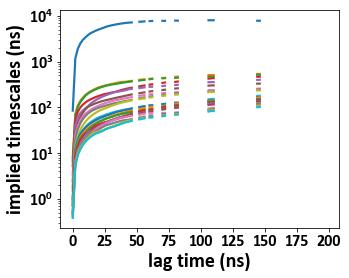

In [8]:
tlag=20
ncom=5
nc=400
lag_times = np.arange(1,2000,20)
n_timescales = 20
msm_timescales = implied_timescales(clustered_trajs, lag_times, n_timescales=n_timescales, msm=MarkovStateModel(verbose=False), n_jobs = 5)
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(1,1,1)
for i in range(n_timescales):
    plt.plot(lag_times*0.1, msm_timescales[:,i]*0.1,lw=2.2)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.xlabel(r'lag time (ns)',fontproperties=font_prop)
plt.ylabel(r'implied timescales (ns)',fontproperties=font_prop)
#plt.ylim(1,10000)
plt.semilogy()
pngname='impliedtimescales_kmedoids'+str(tlag)+'ncom'+str(ncom)+'c'+str(nc)
plt.savefig(pngname,dpi=600,bbox_inches='tight')
plt.show()

Markov state model
------------------
Lag time         : 700
Reversible type  : mle
Ergodic cutoff   : on
Prior counts     : 0

Number of states : 105
Number of nonzero entries in counts matrix : 7960 (72.1995464853%)
Nonzero counts matrix entries:
    Min.   : 0.0
    1st Qu.: 0.0
    Median : 0.0
    Mean   : 1.1
    3rd Qu.: 0.0
    Max.   : 7144.1

Total transition counts :
    8437.93714286 counts
Total transition counts / lag_time:
    12.0541959184 units
Timescales:
    [56161.67, 4230.66, 3624.15, 3140.73, 2767.23, 1732.05, 1279.06, 1110.39, 914.75, 887.51, 853.71, 801.24, 707.80, 621.27, 547.88, 513.00, 498.81, 490.63, 470.76, 424.34, 418.52, 370.98, 369.41, 358.40, 341.32, 326.35, 310.73, 304.17, 299.20, 293.91, 285.21, 280.09, 270.84, 258.94, 247.55, 222.68, 220.04, 217.14, 212.97, 210.74, 206.88, 203.75, 201.66, 201.39, 199.32, 193.05, 192.23, 190.69, 181.51, 174.07, 171.20, 167.21, 165.44, 160.81, 158.20, 155.95, 152.47, 150.95, 149.72, 147.66, 143.97, 139.50, 137.98, 136.

In [6]:
from msmbuilder.lumping import PCCAPlus
pcca = PCCAPlus.from_msm(msm, n_macrostates=3)
macro_trajs = pcca.transform(clustered_trajs)

Optimization terminated successfully.
         Current function value: -2.787389
         Iterations: 10
         Function evaluations: 55


In [8]:
import msmexplorer as msme

/software/anaconda2/envs/msmb/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [10]:
txx = np.concatenate(tica_trajs)

In [11]:
_ = msme.plot_histogram(txx)

In [12]:

msme.plot_free_energy(txx, obs=(0, 1), n_samples=10000,
                      pi=msm.populations_[assignments],
                      xlabel='tIC 1', ylabel='tIC 2')

NameError: name 'assignments' is not defined

In [38]:
assignments = msm.partial_transform(assignments)

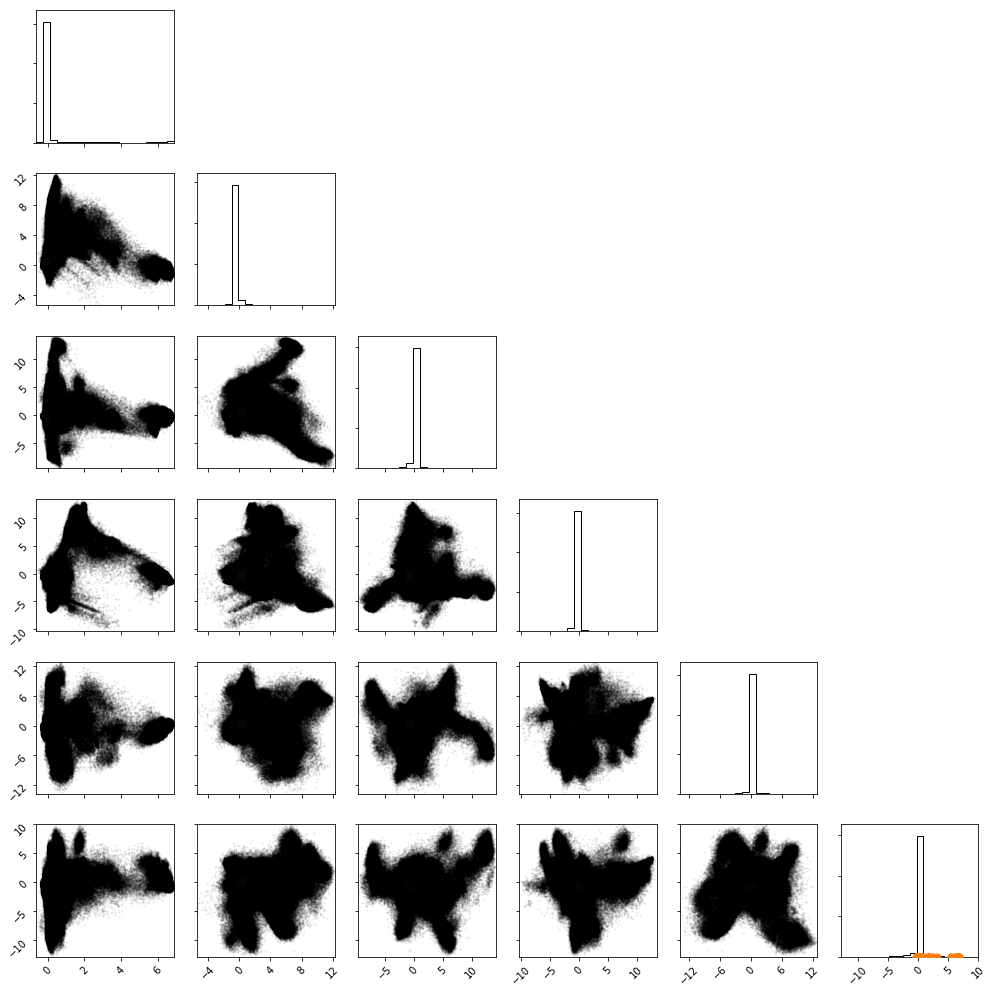

In [13]:

plt.scatter(clusterer.cluster_centers_[msm.state_labels_, 0],
            clusterer.cluster_centers_[msm.state_labels_, 1],
            s=50,
            zorder=3
           )
plt.tight_layout()
plt.show()

In [11]:
pcca.microstate_mapping_

NameError: name 'pcca' is not defined

In [11]:
sample=msm.draw_samples(lab_fix,1000)

In [22]:
all_Qvalue=[]
all_rmsd=[]
for eachin in trj_information:
    rmsd=np.loadtxt('/home/disk2/wdd/PDZ/12concentration/rmsd/fit'+str(int(eachin[0]))+'_pdz'+str(int(eachin[1]))+'.rmsd')
    Q=np.loadtxt('/home/disk2/wdd/PDZ/12concentration/Q_heavyatoms/fit'+str(int(eachin[0]))+'_chain'+str(int(eachin[1]))+'_Q_heavyatoms.cs')
    endtrj=int(eachin[2])*10+1
    all_Qvalue.append(Q[0:endtrj])
    all_rmsd.append(rmsd[0:endtrj])
arr_Qvalue=np.array(all_Qvalue)
arr_rmsd=np.array(all_rmsd)

In [31]:
sample[0][0][1]

5607

In [35]:
wf=open('averageQ_rmsd.cs','w')
wf.write('# Q   Q_sd    rmsd    rmsd_sd\n')
for i in range(len(sample)):
    wf1=open('state'+str(i)+'.Q','w')
    wf2=open('state'+str(i)+'.rmsd','w')
    temp_Q=[]
    temp_rmsd=[]
    for trj in range(len(sample[0])):
        temp_Q.append(arr_Qvalue[sample[i][trj][0]][sample[i][trj][1]])
        temp_rmsd.append(arr_rmsd[sample[i][trj][0]][sample[i][trj][1]])
        wf1.write(str(arr_Qvalue[sample[i][trj][0]][sample[i][trj][1]])+'\n')
        wf2.write(str(arr_rmsd[sample[i][trj][0]][sample[i][trj][1]])+'\n')
    wf1.close()
    wf2.close()
    wf.write(str(np.mean(temp_Q))+'    '+str(np.std(temp_Q))+'    '+str(np.mean(temp_rmsd))+'    '+str(np.std(temp_rmsd))+'\n')
wf.close()

In [24]:
wf=open('cluster_Q.cs','w')
for si in sample:
    

In [91]:
wf=open('cluster_center.cs','w')
for i in range(len(clusterer.cluster_centers_[msm.state_labels_, 0])):
    wf.write(str(clusterer.cluster_centers_[msm.state_labels_, 0][i])+'    '+str(clusterer.cluster_centers_[msm.state_labels_, 1][i])+'\n')
wf.close()

In [92]:
wf=open('pccamicro.cs','w')
for aa in pcca.microstate_mapping_:
    wf.write(str(aa)+'\n')
wf.close()

In [113]:
clusterer.cluster_ids_?

In [122]:
clusterer.cluster_ids_[1]

array([ 493, 5789])

In [131]:
np.mean(all_arr[clusterer.cluster_ids_[msm.state_labels_, 0][1]][clusterer.cluster_ids_[msm.state_labels_, 1][1]])

0.0074074074074074077

In [123]:
wf=open('cluster_center_Q.cs','w')
for i in range(len(clusterer.cluster_centers_[msm.state_labels_, 0])):
    wf.write(str(clusterer.cluster_centers_[msm.state_labels_, 0][i])+'    '+str(clusterer.cluster_centers_[msm.state_labels_, 1][i])+'\n')
wf.close()

array([-0.18150175,  0.11407962, -0.08468859,  0.0229461 , -0.01052007,
       -0.07852214])

In [125]:
clusterer.cluster_ids_[msm.state_labels_, 0][0]

array([655, 375, 225, 363,  80, 154, 304, 330, 664, 188, 307,  17, 532,
       729, 279, 244, 236, 284, 568,  35, 727, 309, 196, 199, 600,  38,
       659, 176, 681, 604, 406, 648, 465, 729,  12, 189, 698, 304, 664,
       132,  83, 601, 332, 386, 212, 613, 601, 724, 633, 363, 424, 580,
       546, 178, 390,  18, 365, 208, 304, 529, 222, 300, 361, 385,  68,
       386, 207, 229, 151, 402, 343, 414,  93, 159, 600, 546,  41, 277,
       549, 535, 332,  62, 596, 192, 648, 309, 309, 601, 170, 688, 100,
       248, 599, 361, 653,  68, 335, 194, 158, 112, 592, 432, 442, 195, 356])